# Mini Projeto de Análise de Dados

## Escopo.
Dados de 2019 de uma empresa de prestação de serviços.
Tendo as seguinte base de dados:
 * CadastroFuncionarios
 * CadastroClientes
 * BaseServiçosPrestados
 
Objetivos:
 1. Obter o Valor Total da Folha Salarial
 2. Saber o faturamento da empresa
 3. Qual a porcentagem de funcionários que já fechou algum contrato.
 4. Total de contratos fechados por cada área da empresa
 5. A quantidade de funcionários por área
 6. Qual o ticket médio mensal dos contratos.

In [1]:
# importação de bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt   # optei usar essa biblioteca para o gráfico, apenas por praticar

#### 1. Obtendo o valor da Folha Salarial

In [2]:
# importação da base de dados. 
# Os parâmetros sep e decimal foram utilizados, para a correta formatação do dataframe.
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')

# para calcular a folha salarial foi efetuada a soma do salário base, impostos, benefícios, VT e VR de todos os funcionários.
folha_salarial = funcionarios_df['Salario Base'].sum() + funcionarios_df['Impostos'].sum() \
+ funcionarios_df['Beneficios'].sum() + funcionarios_df['VT'].sum() + funcionarios_df['VR'].sum()

# como se trata de apenas exibir os valores, desnecessário uso posterior dos dados 
print('Folha Salarial no valor de R$ {:,.2f}'.format(folha_salarial))

Folha Salarial no valor de R$ 2,717,493.22


#### 2. Chegando ao valor do Faturamento da Empresa

In [3]:
# importação da base de dados
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')   # este arquivo em questão era formato .xlsx
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';')

# colocando a coluna ID cliente como índice, necessário para etapa seguinte
servicos_df = servicos_df[['ID Cliente', 'ID Funcionário', 'Codigo do Servico', 'Tempo Total de Contrato (Meses)']] 

# efetuando o merge de ambos dos dataframes, criando um novo onde a coluna ID Cliente é a chave.
servicos_clientes_df = servicos_df.merge(clientes_df, on = 'ID Cliente')

# criação de listas com cada tempo de contrato e seu respectivo valor.
contrato_tempo = list(servicos_clientes_df['Tempo Total de Contrato (Meses)'])
contrato_valor = list(servicos_clientes_df['Valor Contrato Mensal'])

# lista para armazenar o valor calculado
valor_mensal = []

# usando laço de repetição for (comentado):
# for i, meses in enumerate(contrato_tempo):
#     valor_mensal.append(meses * contrato_valor[i])

# usando list comprehension
valor_mensal = [meses * contrato_valor[i] for i, meses in enumerate(contrato_tempo)]

# iniciando variável faturamento
faturamento = 0

# somando todos os valores adquiridos anteriormente e acrescentando ao faturamento
for valor in valor_mensal:
    faturamento += valor

# exibindo a valor do faturamento
print('Faturamento de R${:,.2f}'.format(faturamento))

Faturamento de R$5,519,160.00


#### 3. Porcentagem de funcionários que fecharam contrato

In [4]:
# importação da base de dados
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')

# mantendo somente as colunas de interesse
funcionarios_df = funcionarios_df[['ID Funcionário', 'Nome Completo','Area']]

# criando novo dataframe serviços
servicos_df = servicos_df[['Codigo do Servico', 'ID Funcionário']]

# mesclando o dataframe servicos com a de funcionários, tendo a coluna ID Funcionários como chave.
servicos_df = servicos_df.merge(funcionarios_df, on = 'ID Funcionário')

# variável com o total de funcionarios
funcionarios_total = funcionarios_df['ID Funcionário']

# criando novo dataframe com os IDs sem duplicatas a partir do dataframe de funcionarios_serv
funcionarios_serv = servicos_df['ID Funcionário'].unique()

# exibindo valor em porcentagem, entretanto, optei por efetuar o cálculo final dentro da formatação.
print('Cerca de {:.2%} dos funcionários fecharam negócios.'.format(len(funcionarios_serv) / len(funcionarios_total)))

Cerca de 86.84% dos funcionários fecharam negócios.


#### 4. Contratos fechados por área da empresa

In [5]:
# obtendo somente informações necessárias dos funcionarios e serviços
funcionarios = funcionarios_df[['ID Funcionário', 'Area']]
servicos = servicos_df[['ID Funcionário']]

# mesclei servicos com funcionarios
servicos = servicos.merge(funcionarios, on = 'ID Funcionário')

# dicionário com a quantidade de contratos por área
servicos_area = dict(servicos['Area'].value_counts())

display("Total de contratos por setor:", servicos_area)

'Total de contratos por setor:'

{'Administrativo': 63,
 'Operações': 48,
 'Comercial': 44,
 'Financeiro': 42,
 'Logística': 40}

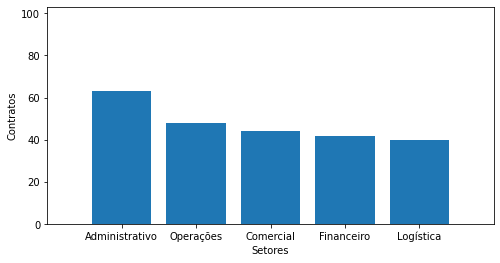

In [6]:
# atribuindo cada valor do dicionário para variáveis a fim de simplificar a montagem do gráfico
areas = servicos_area.keys()
servicos = servicos_area.values()

# exibição de gráfico simples para melhor panorama
plt.figure(figsize = (8, 4))
plt.bar(areas, servicos)
plt.axis([-1, 5, 0, max(servicos) + 40])
plt.ylabel('Contratos')
plt.xlabel('Setores')

plt.show()

#### 5. Quantidade de funcionários por setor

In [7]:
display('Funcionários por setor:', funcionarios['Area'].value_counts())

'Funcionários por setor:'

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

#### 6. Ticket médio mensal por contrato

In [8]:
display('Média dos contratos: R${:.2f}'.format(clientes_df['Valor Contrato Mensal'].mean()))

'Média dos contratos: R$2502.56'